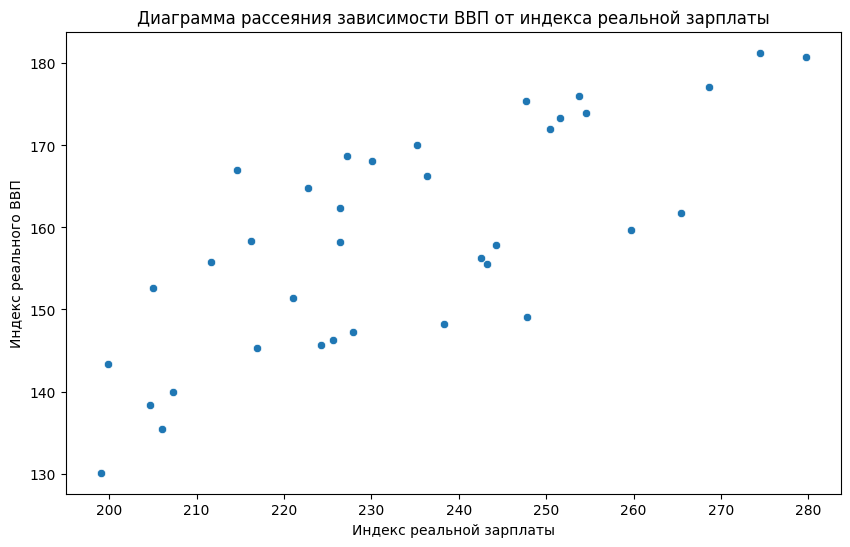

Коэффициент корреляции: 0.7483003439767375
p-значение: 1.5465793733155505e-07


In [1]:
#Task_1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Загрузка данных
file_path = 'КР_15_вариант.xlsx'
data = pd.read_excel(file_path)

# Очистка данных (удаление пробелов и замена запятых на точки для корректного преобразования в числовой формат)
data['Real_Wage_Index'] = data['Индекс реальной зарплаты'].str.replace(',', '.').astype(float)
data['Real_GDP_Index'] = data['Индекс реального ВВП '].str.replace(',', '.').astype(float)

# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Real_Wage_Index'], y=data['Real_GDP_Index'])
plt.xlabel('Индекс реальной зарплаты')
plt.ylabel('Индекс реального ВВП')
plt.title('Диаграмма рассеяния зависимости ВВП от индекса реальной зарплаты')
plt.show()

# Вычисление коэффициента корреляции Пирсона
correlation_coefficient, p_value = pearsonr(data['Real_Wage_Index'], data['Real_GDP_Index'])
print("Коэффициент корреляции:", correlation_coefficient)
print("p-значение:", p_value)


In [2]:
#Task_2
import statsmodels.api as sm

# Зависимая и независимая переменные
y = data['Real_GDP_Index']
x = data['Real_Wage_Index']

# Добавляем константу к независимой переменной для выполнения регрессии
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()

# Вывод результатов регрессии
print(model.summary())

# Средняя относительная ошибка аппроксимации
mean_relative_error = (abs((model.predict(X) - y) / y)).mean()
print("Средняя относительная ошибка аппроксимации:", mean_relative_error)


                            OLS Regression Results                            
Dep. Variable:         Real_GDP_Index   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     43.26
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           1.55e-07
Time:                        18:23:06   Log-Likelihood:                -129.44
No. Observations:                  36   AIC:                             262.9
Df Residuals:                      34   BIC:                             266.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              49.7802     16.631     

In [3]:
#Task_3
from scipy.stats import shapiro

# Остатки модели
residuals = model.resid

# Тест Шапиро-Уилка
stat, p_value_shapiro = shapiro(residuals)
print("Статистика теста Шапиро-Уилка:", stat)
print("p-значение:", p_value_shapiro)
if p_value_shapiro > 0.05:
    print("Остатки нормально распределены.")
else:
    print("Остатки не являются нормально распределенными.")


Статистика теста Шапиро-Уилка: 0.944030096904564
p-значение: 0.06788157438032069
Остатки нормально распределены.


Статистика Бреуша-Пагана: 0.5632614079459488
p-значение: 0.45294914838863687
Гомоскедастичность подтверждается.


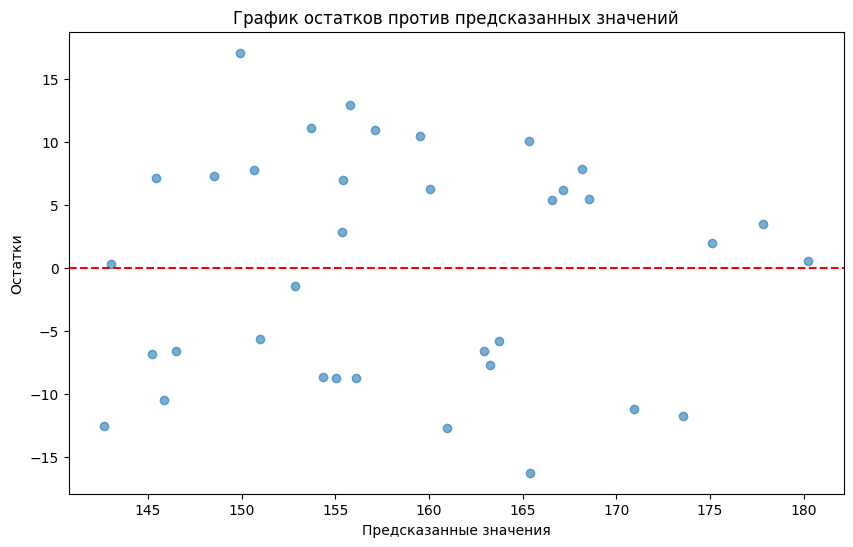

In [4]:
#Task_4
from statsmodels.stats.diagnostic import het_breuschpagan

# Тест Бреуша-Пагана
bp_test = het_breuschpagan(residuals, X)
print("Статистика Бреуша-Пагана:", bp_test[0])
print("p-значение:", bp_test[1])
if bp_test[1] > 0.05:
    print("Гомоскедастичность подтверждается.")
else:
    print("Наблюдается гетероскедастичность.")

# Построение графика остатков против предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.title("График остатков против предсказанных значений")
plt.show()


Точечное прогнозное значение: 164.16349009530873
Доверительный интервал (95%): (np.float64(160.66020313095288), np.float64(167.66677705966458))


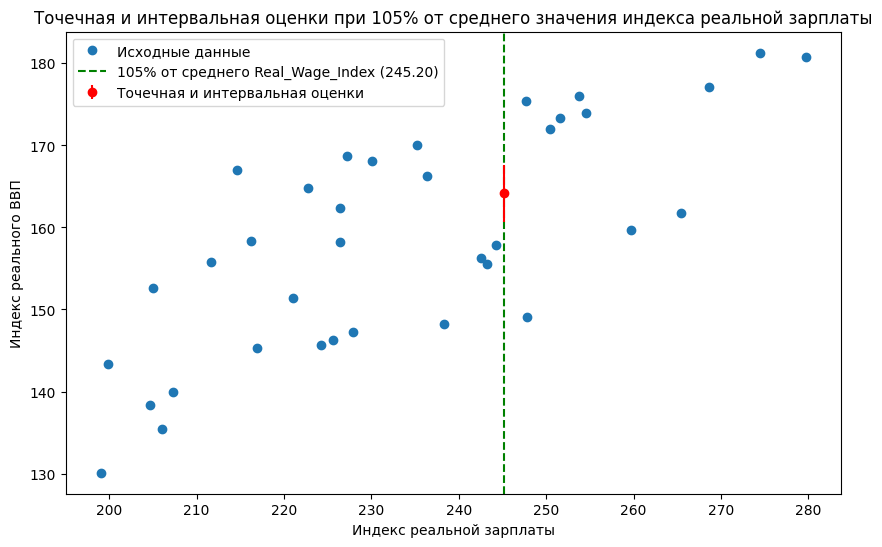

In [5]:
#Task_5
import pandas as pd

# Среднее значение экзогенной переменной
mean_x = x.mean()
new_x_value = 1.05 * mean_x

# Создание DataFrame для предсказания
new_X = pd.DataFrame({'const': [1], 'Real_Wage_Index': [new_x_value]})

# Прогнозное значение и доверительный интервал
prediction = model.get_prediction(new_X)
prediction_summary = prediction.summary_frame(alpha=0.05)

# Вывод результатов
point_estimate = prediction_summary['mean'][0]
lower_bound = prediction_summary['mean_ci_lower'][0]
upper_bound = prediction_summary['mean_ci_upper'][0]
print("Точечное прогнозное значение:", point_estimate)
print("Доверительный интервал (95%):", (lower_bound, upper_bound))

# Построение графика точечной и интервальной оценки
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Исходные данные')
plt.axvline(new_x_value, color='green', linestyle='--', label=f'105% от среднего Real_Wage_Index ({new_x_value:.2f})')
plt.errorbar(new_x_value, point_estimate, yerr=[[point_estimate - lower_bound], [upper_bound - point_estimate]], fmt='o', color='red', label='Точечная и интервальная оценки')
plt.xlabel("Индекс реальной зарплаты")
plt.ylabel("Индекс реального ВВП")
plt.title("Точечная и интервальная оценки при 105% от среднего значения индекса реальной зарплаты")
plt.legend()
plt.show()


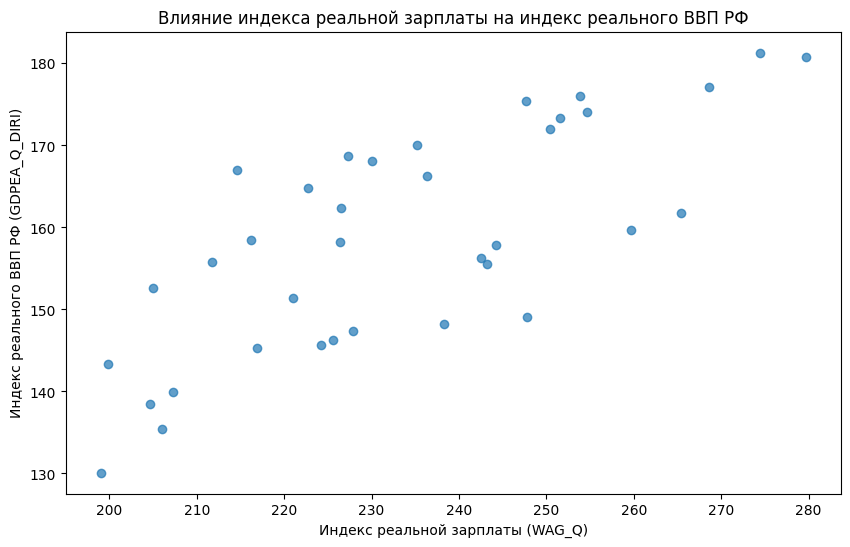

Коэффициент корреляции: 0.7483003439767375
p-значение: 1.5465793733155505e-07
                            OLS Regression Results                            
Dep. Variable:           GDPEA_Q_DIRI   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     43.26
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           1.55e-07
Time:                        18:42:14   Log-Likelihood:                -129.44
No. Observations:                  36   AIC:                             262.9
Df Residuals:                      34   BIC:                             266.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

In [8]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Загрузка данных
file_path = 'КР_15_вариант.xlsx'
data = pd.read_excel(file_path)

# Очистка данных: замена запятых на точки и преобразование к числовому типу
data['WAG_Q'] = data['Индекс реальной зарплаты'].str.replace(',', '.').astype(float)
data['GDPEA_Q_DIRI'] = data['Индекс реального ВВП '].str.replace(',', '.').astype(float)

# Зависимая и независимая переменные
y = data['GDPEA_Q_DIRI']  # зависимая переменная (Индекс реального ВВП)
x = data['WAG_Q']  # независимая переменная (Индекс реальной зарплаты)

# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7)
plt.xlabel("Индекс реальной зарплаты (WAG_Q)")
plt.ylabel("Индекс реального ВВП РФ (GDPEA_Q_DIRI)")
plt.title("Влияние индекса реальной зарплаты на индекс реального ВВП РФ")
plt.show()

# Расчет коэффициента корреляции Пирсона
correlation_coefficient, p_value = pearsonr(x, y)
print("Коэффициент корреляции:", correlation_coefficient)
print("p-значение:", p_value)

# Построение модели линейной регрессии
X = sm.add_constant(x)  # добавление константы
model = sm.OLS(y, X).fit()

# Вывод результатов регрессии
print(model.summary())

# Средняя относительная ошибка аппроксимации
mean_relative_error = (abs((model.predict(X) - y) / y)).mean()
print("Средняя относительная ошибка аппроксимации:", mean_relative_error)
